In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_excel("C://Users//pc//Desktop//IBM edunet//Projects//CVD_cleaned.xlsx")

In [3]:
data.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183,154.22,46.11,No,0,12,12,12
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175,69.85,22.74,Yes,0,16,8,0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165,108.86,39.94,Yes,3,30,8,8
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163,72.57,27.46,Yes,0,12,12,4
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163,91.63,34.67,No,0,12,12,1


In [4]:
data.shape

(308854, 19)

In [5]:
print(data.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [6]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [8]:
label_encoder = LabelEncoder()
data["General_Health"] = label_encoder.fit_transform(data["General_Health"])
data["Checkup"] = label_encoder.fit_transform(data["Checkup"])
data["Exercise"] = label_encoder.fit_transform(data["Exercise"])
data["Heart_Disease"] = label_encoder.fit_transform(data["Heart_Disease"])
data["Skin_Cancer"] = label_encoder.fit_transform(data["Skin_Cancer"])
data["Other_Cancer"] = label_encoder.fit_transform(data["Other_Cancer"])
data["Depression"] = label_encoder.fit_transform(data["Depression"])
data["Diabetes"] = label_encoder.fit_transform(data["Diabetes"])
data["Arthritis"] = label_encoder.fit_transform(data["Arthritis"])
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["Smoking_History"] = label_encoder.fit_transform(data["Smoking_History"])

In [9]:
data.Age_Category.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [10]:
age_mapping = {
    '18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42,
    '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67,
    '70-74': 72, '75-79': 77, '80+': 85
}
data['Age_Category'] = data['Age_Category'].map(age_mapping)

In [11]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,72,150,32.66,14.54,1,0,30,16,12
1,4,4,0,1,0,0,0,2,0,0,72,165,77.11,28.29,0,0,30,0,4
2,4,4,1,0,0,0,0,2,0,0,62,163,88.45,33.47,0,4,12,3,16
3,3,4,1,1,0,0,0,2,0,1,77,180,93.44,28.73,0,0,30,30,8
4,2,4,0,0,0,0,0,0,0,1,85,191,88.45,24.37,1,0,8,4,0


In [12]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [13]:
data['CHD_risk'] = 0

In [16]:
def cal_risk(row):
    score = 0
    # Age over 60 adds to the risk
    if row['Age_Category'] >= 60:
        score += 1
    # Male adds to the risk
    if row['Sex'] == 1:
        score += 1
    # Lack of exercise adds to the risk
    if row['Exercise'] == 0:
        score += 1
    # History of heart disease adds to the risk
    if row['Heart_Disease'] == 1:
        score += 1
    # Diabetes adds to the risk
    if row['Diabetes'] == 1:
        score += 1
    # Smoking history adds to the risk
    if row['Smoking_History'] == 1:
        score += 1
    # BMI over 25 (overweight/obese) adds to the risk
    if row['BMI'] > 25:
        score += 1
    # High alcohol consumption adds to the risk
    if row['Alcohol_Consumption'] > 2:  # Assuming more than 2 times per week is high
        score += 1
    # Low fruit consumption adds to the risk
    if row['Fruit_Consumption'] < 3:  # Assuming less than 3 servings per day is low
        score += 1
    # Low green vegetable consumption adds to the risk
    if row['Green_Vegetables_Consumption'] < 3:  # Assuming less than 3 servings per day is low
        score += 1
    # High fried potato consumption adds to the risk
    if row['FriedPotato_Consumption'] > 1:  # Assuming more than 1 serving per week is high
        score += 1
    
    return score
data['Risk_Score'] = data.apply(cal_risk, axis=1)
risk_threshold = 5
data['CHD_Risk'] = data['Risk_Score'].apply(lambda x: 1 if x >= risk_threshold else 0)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int32  
 1   Checkup                       308854 non-null  int32  
 2   Exercise                      308854 non-null  int32  
 3   Heart_Disease                 308854 non-null  int32  
 4   Skin_Cancer                   308854 non-null  int32  
 5   Other_Cancer                  308854 non-null  int32  
 6   Depression                    308854 non-null  int32  
 7   Diabetes                      308854 non-null  int32  
 8   Arthritis                     308854 non-null  int32  
 9   Sex                           308854 non-null  int32  
 10  Age_Category                  308854 non-null  int64  
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [19]:
data.drop(columns=['Risk_Score'])

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,CHD_risk,CHD_Risk
0,3,2,0,0,0,0,0,0,1,0,...,150,32.66,14.54,1,0,30,16,12,0,0
1,4,4,0,1,0,0,0,2,0,0,...,165,77.11,28.29,0,0,30,0,4,0,1
2,4,4,1,0,0,0,0,2,0,0,...,163,88.45,33.47,0,4,12,3,16,0,0
3,3,4,1,1,0,0,0,2,0,1,...,180,93.44,28.73,0,0,30,30,8,0,1
4,2,4,0,0,0,0,0,0,0,1,...,191,88.45,24.37,1,0,8,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,...,168,81.65,29.05,0,4,30,8,0,0,0
308850,1,3,1,0,0,0,0,2,0,1,...,180,69.85,21.48,0,8,15,60,4,0,0
308851,4,0,1,0,0,0,1,3,0,0,...,157,61.23,24.69,1,4,40,8,4,0,0
308852,4,4,1,0,0,0,0,0,0,1,...,183,79.38,23.73,0,3,30,12,0,0,0


In [20]:
data = data.drop(columns=['CHD_risk'])

In [22]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Risk_Score',
       'CHD_Risk'],
      dtype='object')

In [23]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Risk_Score,CHD_Risk
0,3,2,0,0,0,0,0,0,1,0,...,150,32.66,14.54,1,0,30,16,12,4,0
1,4,4,0,1,0,0,0,2,0,0,...,165,77.11,28.29,0,0,30,0,4,6,1
2,4,4,1,0,0,0,0,2,0,0,...,163,88.45,33.47,0,4,12,3,16,4,0
3,3,4,1,1,0,0,0,2,0,1,...,180,93.44,28.73,0,0,30,30,8,5,1
4,2,4,0,0,0,0,0,0,0,1,...,191,88.45,24.37,1,0,8,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,...,168,81.65,29.05,0,4,30,8,0,3,0
308850,1,3,1,0,0,0,0,2,0,1,...,180,69.85,21.48,0,8,15,60,4,4,0
308851,4,0,1,0,0,0,1,3,0,0,...,157,61.23,24.69,1,4,40,8,4,3,0
308852,4,4,1,0,0,0,0,0,0,1,...,183,79.38,23.73,0,3,30,12,0,3,0


In [24]:
data = data.drop(columns=['Risk_Score'])

In [25]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'CHD_Risk'],
      dtype='object')

In [26]:
data.CHD_Risk

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: CHD_Risk, Length: 308854, dtype: int64

In [29]:
data.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,CHD_Risk
0,3,2,0,0,0,0,0,0,1,0,72,150,32.66,14.54,1,0,30,16,12,0
1,4,4,0,1,0,0,0,2,0,0,72,165,77.11,28.29,0,0,30,0,4,1


In [34]:
y = data.CHD_Risk
X = data.iloc[:,:-1].values

In [35]:
y

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: CHD_Risk, Length: 308854, dtype: int64

In [36]:
X

array([[ 3.,  2.,  0., ..., 30., 16., 12.],
       [ 4.,  4.,  0., ..., 30.,  0.,  4.],
       [ 4.,  4.,  1., ..., 12.,  3., 16.],
       ...,
       [ 4.,  0.,  1., ..., 40.,  8.,  4.],
       [ 4.,  4.,  1., ..., 30., 12.,  0.],
       [ 0.,  4.,  1., ...,  5., 12.,  1.]])

In [37]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

In [38]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [39]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
print(len(y_test))
print(len(y_pred))

92657
92657


In [42]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of the model is : ',accuracy*100,"%")

The accuracy of the model is :  99.5337643135435 %


In [43]:
confusionMatrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusionMatrix)

Confusion Matrix:
 [[65585    36]
 [  396 26640]]


In [44]:
recall = recall_score(y_test,y_pred)
print("Recall:\t",recall)

Recall:	 0.9853528628495339


In [45]:
precision = precision_score(y_test,y_pred)
print("Precision:\t",precision)

Precision:	 0.9986504723346828


In [49]:
#X.shape

In [48]:
#data.shape

In [50]:
f1 = f1_score(y_test,y_pred)
print("F1 score=\t",f1)

F1 score=	 0.9919571045576407


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

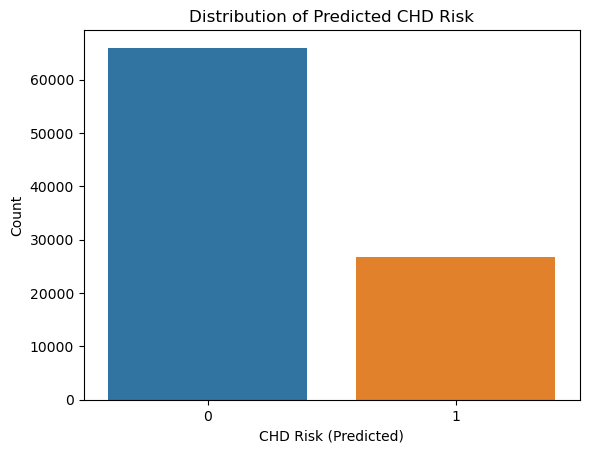

In [52]:
sns.countplot(x=y_pred)
plt.title("Distribution of Predicted CHD Risk")
plt.xlabel("CHD Risk (Predicted)")
plt.ylabel("Count")
plt.show()

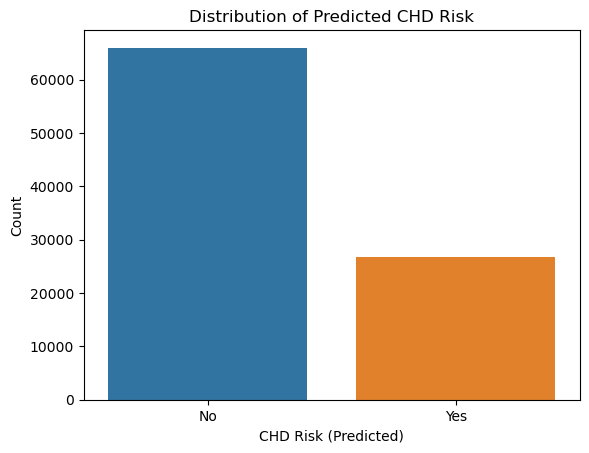

In [54]:
risk_mapping = {0:'No', 1:'Yes'}
y_pred_labels = pd.Series(y_pred).map(risk_mapping)
sns.countplot(x=y_pred_labels)
plt.title("Distribution of Predicted CHD Risk")
plt.xlabel("CHD Risk (Predicted)")
plt.ylabel("Count")
plt.show()